# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## Project overview:

In this project I went through the Starbucks offers and members dataset to see how customers responded to the offers sent previously to improve the future sales. I examined offers that had been sent, offers that worked best to increase the engagements of the members, and offers that Starbucks needs to send in order to encourage the members to purchase more. In this analysis that is followed by 4 machine learning models, first, I combined 3 datasets of members data, categories of offers' data and event record data. Following that, I showed some visualizations of the patterns I found in the combined dataset along with 4 different machine learning models that can be used later to predict the potential sales with having customer's data.
<br>The objective of this project is to build a model that can predict whether a member will respond to an offer or not. To achieve this goal I needed a reliable dataset that can be found as 3 json files, portfolio, profile and transcript.
<br>This Notebook consists of multiple steps I took to meet my goal.
<br>1. Data exploration and visualization, getting familiar with the datasets, rows and columns of each.
<br>2. Merging 3 datasets to get the final dataset
<br>3. Analysis and visualizations of the final dataset, asking questions and answer them.
<br>4. Modeling and Evaluations of the models, choosing different machine learning classifiers and evaluation metrics such as accuracy, f-1 score, precision and recall to capture how correct our model predicted the outcome.

### Lets get started:

#### Installing required versions of libraries

In [3]:
# Installing required versions of libraries before importing the libraries
!pip install -U seaborn

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import math
import json
import time
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Data Exploring

In [5]:
# Read the json files into 3 dataframes
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

____________________________________________________________________________



### A. Portfolio Dataframe

In [6]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [7]:
portfolio.shape

(10, 6)

In [8]:
portfolio.dtypes

channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object

In [9]:
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

No null values in portfolio dataframe.

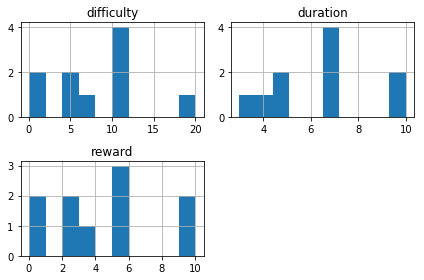

In [10]:
# Histogram of portfolio dataframe
portfolio.hist()
plt.tight_layout();

Most repeated difficulty is 10, reward is 6 and duration is 7.

In [11]:
# How many offers we have per category
portfolio.offer_type.value_counts()

discount         4
bogo             4
informational    2
Name: offer_type, dtype: int64

We have 4 types of buy one get one offers and 4 types of discounts, but 2 informational messages.

In [12]:
# If the offer is bogo what are the rewards
portfolio[portfolio['offer_type'] == 'bogo']['reward']

0    10
1    10
3     5
8     5
Name: reward, dtype: int64

Bogo offers have 10 or 5 reward points.

In [13]:
# Difficulty column values
portfolio.difficulty.unique()

array([10,  0,  5, 20,  7])

In [14]:
# Duration column values
portfolio.duration.unique()

array([ 7,  5,  4, 10,  3])

In [15]:
# Reward column values
portfolio.reward.unique()

array([10,  0,  5,  3,  2])

In [16]:
# Cleaning Portfolio Dataframe

clean_portfolio = portfolio.copy()

# Rename id column
clean_portfolio.rename(columns={'id':'offer_id'}, inplace=True)

# Channels column to string
clean_portfolio = clean_portfolio.astype({"channels": str})

# Removing special characters in channels column
clean_portfolio['channels'] = clean_portfolio['channels'].str.replace('[' , '')
clean_portfolio['channels'] = clean_portfolio['channels'].str.replace(']' , '')
clean_portfolio['channels'] = clean_portfolio['channels'].str.replace('\'' , '')

# Create dummies for channels column
channels_dummies = pd.get_dummies(portfolio['channels'].apply(pd.Series).stack(), prefix = 'ch').sum(level=0)
clean_portfolio = pd.concat([clean_portfolio, channels_dummies], axis=1, sort=False)

clean_portfolio.drop(columns='channels', inplace=True)

In [17]:
# Final portfolio dataframe
clean_portfolio.head()

,difficulty,duration,offer_id,offer_type,reward,ch_email,ch_mobile,ch_social,ch_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1


-----------------------------------------





### Profile Dataframe

In [18]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [19]:
profile.shape

(17000, 5)

In [20]:
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

In [21]:
# Exploring null values in the profile dataframe
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

Gender and income columns have 2175 null values.

In [22]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


We can see the maximum age is 118 years which is not normal. I have 2 speculations, one is that a person passes away and the membership does not get cancelled, or the members put their birthday year wrongly. We can explore more later to find the answer. 

In [23]:
# Cleaning Profile Dataframe

clean_profile = profile.copy()

# Rename id column
clean_profile.rename(columns={'id':'customer_id'}, inplace=True)

# Rename became_member_on column
clean_profile.rename(columns={'became_member_on':'membership_date'}, inplace=True)

# Drop rows with null value
clean_profile.dropna(inplace = True)

# Change datetime format
clean_profile['membership_date'] = pd.to_datetime(clean_profile['membership_date'], format = '%Y%m%d')

# Get the year members joined
clean_profile['year_joined'] = clean_profile['membership_date'].dt.year

# Create dummy columns for gender
gender_dummies = pd.get_dummies(clean_profile['gender'].apply(pd.Series).stack(), prefix = 'gender').sum(level=0)
clean_profile = pd.concat([clean_profile, gender_dummies], axis=1, sort=False)

# Final profile dataframe
clean_profile.head()

,age,membership_date,gender,customer_id,income,year_joined,gender_F,gender_M,gender_O
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,1,0,0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,1,0,0
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,0,1,0
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,0,1,0
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,0,1,0


In [24]:
clean_profile.isnull().sum()

age                0
membership_date    0
gender             0
customer_id        0
income             0
year_joined        0
gender_F           0
gender_M           0
gender_O           0
dtype: int64

We dropped the rows with null values. Now we see that we have no null values in profile dataset.

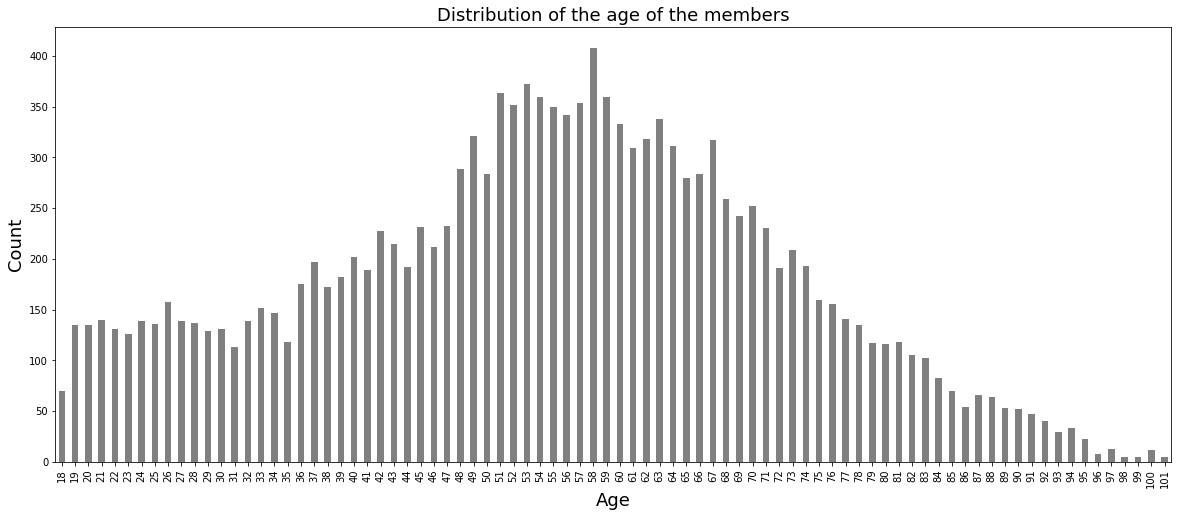

In [25]:
# Plotting the distribution of ages in profile dataframe 
clean_profile['age'].value_counts().sort_index(ascending=True).plot.bar(figsize=(20,8), fontsize=10, color = 'grey');
plt.xlabel('Age', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of the age of the members', fontsize=18)
plt.show()

We can see from the graph above that most members e in their 50s. We don't see ages more than 101, and it seems with dropping rows with null values the highest age is 101 now.

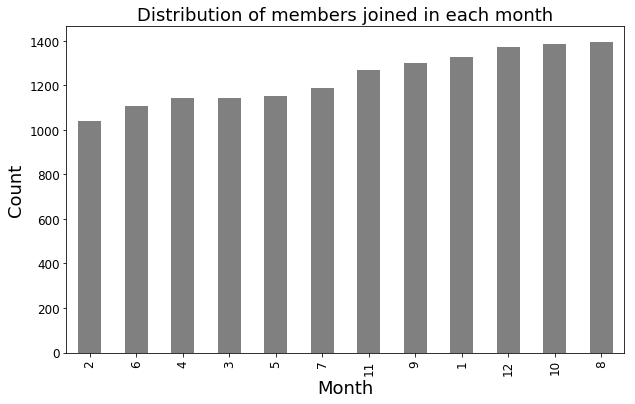

In [26]:
# Plotting the distribution of customer joined as members each month
pd.to_datetime(clean_profile['membership_date'],\
               format='%Y%m%d').dt.month.value_counts().sort_values(ascending=True).plot.bar(figsize=(10,6),\
                                                                                           fontsize=12,color='grey');
plt.xlabel('Month', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of members joined in each month', fontsize=18)
plt.show()

We can see that in February less members joined. And in August Starbucks gained the highest number of members.

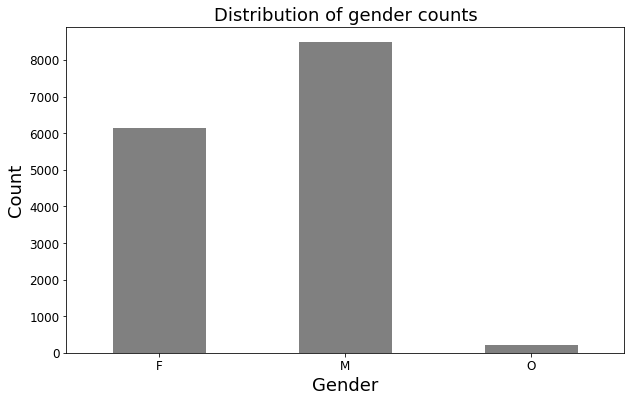

In [27]:
# Plotting the distribution of gender in profile dataframe
clean_profile['gender'].value_counts().sort_index(ascending=True).plot.bar(figsize=(10,6), fontsize=12,color='grey');
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation='horizontal')
plt.title('Distribution of gender counts', fontsize=18)
plt.show()

We can see that number of male members are significantly higher than female memebers or members from 'other' group.

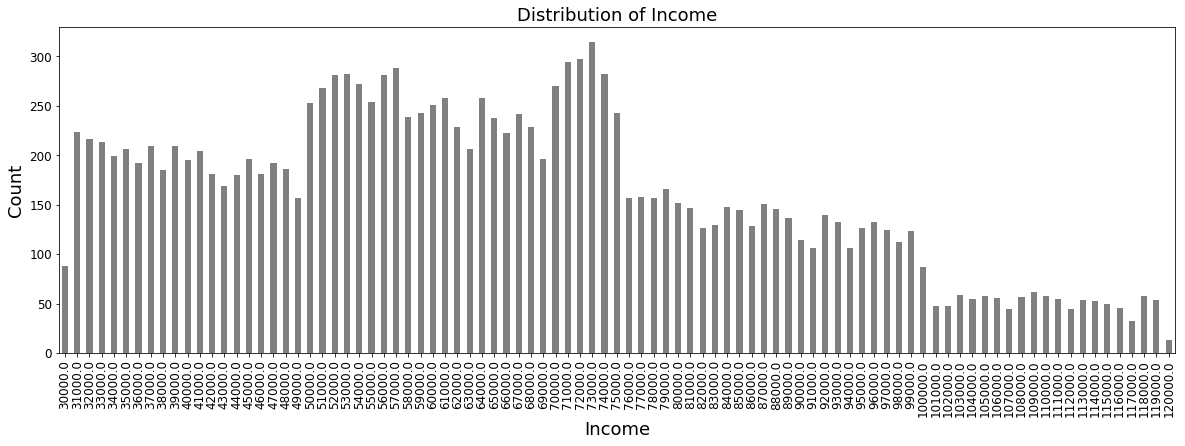

In [28]:
# Plotting the distribution of income of the members from profile dataframe
clean_profile['income'].value_counts().sort_index(ascending=True).plot.bar(figsize=(20,6), fontsize=12,color='grey');
plt.xlabel('Income', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation='vertical')
plt.title('Distribution of Income', fontsize=18)
plt.show()

We can see that mostly members have 50K to 75K salaries. Also, we have less members with salaries above 100K. This distribution is not a normal distribution and inferring from it is a bit hard.

-------------------------------------------------



### Transcript Dataframe

In [29]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [30]:
transcript.shape

(306534, 4)

In [31]:
transcript.dtypes

event     object
person    object
time       int64
value     object
dtype: object

In [32]:
# Top five person with the most appearance in the dataframe.
transcript.person.value_counts().head()

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
5e60c6aa3b834e44b822ea43a3efea26    48
d0a80415b84c4df4908b8403b19765e3    48
Name: person, dtype: int64

Since we don't see how many of these offers received by the person with the first ID above changed to a transaction we can not infer that this person is the most valuable customer. We need to analyze further that how many of the offers has been responded by a person.

In [33]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [34]:
# Exploring the transcript dataframe where the event is transaction
# This means the offer is recieved by the member, viewed and resulted in a purchase
transcript.loc[transcript.event == "transaction"].shape

(138953, 4)

There are more than 138,000 transactions after offer received. The whole dataset is more than 306,000 rows. We can see that almost 45% of the offers motivated members to purchase.

In [35]:
transcript.time.unique()

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306,
       312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384,
       390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462,
       468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540,
       546, 552, 558, 564, 570, 576, 582, 588, 594, 600, 606, 612, 618,
       624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696,
       702, 708, 714])

In [36]:
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

We have no null values in the transcript dataset.

In [37]:
# Cleaning Transcript Dataframe

clean_transcript = transcript.copy()

# Creating dummy columns from event column so we can see
clean_transcript['event'] = clean_transcript['event'].map(lambda x: x.replace('offer ','offer_'))
event_dummies = pd.get_dummies(clean_transcript.event)
clean_transcript = pd.concat([clean_transcript, event_dummies], axis=1, sort=False)
clean_transcript.drop(columns='event', inplace=True)

# Rename 2 columns
clean_transcript.rename(columns={'offer_ceived':'offer_received'}, inplace=True)
clean_transcript.rename(columns={'person':'customer_id'}, inplace=True)

In [38]:
# Number of rows that had transaction event
clean_transcript.loc[clean_transcript.transaction == 1].shape

(138953, 7)

In [39]:
# Expanding value column
values = clean_transcript['value'].apply(pd.Series)
clean_transcript = pd.concat([clean_transcript, values], axis=1)

clean_transcript.head()

,customer_id,time,value,offer_completed,offer_received,offer_viewed,transaction,offer id,amount,offer_id,reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,1,0,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN


In [40]:
# Filling offer id column
clean_transcript['offer id'] = clean_transcript['offer id'].fillna(clean_transcript['offer_id'])
clean_transcript = clean_transcript.drop(columns='offer_id', axis=1)

clean_transcript.head()

,customer_id,time,value,offer_completed,offer_received,offer_viewed,transaction,offer id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,1,0,0,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


In [41]:
# Filling reward and amount column
clean_transcript['amount'] = clean_transcript['amount'].fillna(0)
clean_transcript['reward'] = clean_transcript['reward'].fillna(0)

clean_transcript.rename(columns={'offer id':'offer_id'}, inplace=True)
clean_transcript.drop(['value'], axis=1, inplace = True)

In [42]:
# Final transcript dataframe
clean_transcript.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.0
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.0


-------------------------------------------------




# Merging datasets

### Prepared Dataset

In [43]:
clean_profile.head()

,age,membership_date,gender,customer_id,income,year_joined,gender_F,gender_M,gender_O
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,1,0,0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,1,0,0
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,0,1,0
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,0,1,0
12,58,2017-11-11,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,0,1,0


In [44]:
clean_transcript.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,0.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.0
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.0


In [45]:
clean_portfolio.head()

,difficulty,duration,offer_id,offer_type,reward,ch_email,ch_mobile,ch_social,ch_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1


In [46]:
# Merging the transcript and profile dataframes
merge_transcript_profile = pd.merge(clean_transcript, clean_profile, on='customer_id', how='right')

# Merging the result of above with portfolio dataframe
df = pd.merge(merge_transcript_profile, clean_portfolio, on='offer_id', how='right')

In [47]:
# Didn't need the gender dummies or reward column twice, so we dropped them
df = df.drop(['gender_F', 'gender_M', 'reward_y', 'gender_O'], axis=1)

In [48]:
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,reward_x,age,...,gender,income,year_joined,difficulty,duration,offer_type,ch_email,ch_mobile,ch_social,ch_web
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,75,...,F,100000.0,2017,5,7,bogo,1,1,0,1
1,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,75,...,F,100000.0,2017,5,7,bogo,1,1,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,5.0,75,...,F,100000.0,2017,5,7,bogo,1,1,0,1
3,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,68,...,M,70000.0,2018,5,7,bogo,1,1,0,1
4,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.0,68,...,M,70000.0,2018,5,7,bogo,1,1,0,1


In [49]:
# Replacing offer_ids with the actual name of the offer as offer type
offer_id = {'ae264e3637204a6fb9bb56bc8210ddfd':'bogo_1',
                '4d5c57ea9a6940dd891ad53e9dbe8da0':'bogo_2',
                '9b98b8c7a33c4b65b9aebfe6a799e6d9':'bogo_3',
                'f19421c1d4aa40978ebb69ca19b0e20d':'bogo_4',
                '0b1e1539f2cc45b7b9fa7c272da2e1d7':'discount_1',
                '2298d6c36e964ae4a3e7e9706d1fb8c2':'discount_2',
                'fafdcd668e3743c1bb461111dcafc2a4':'discount_3',
                '2906b810c7d4411798c6938adc9daaa5':'discount_4',
                '3f207df678b143eea3cee63160fa8bed':'info_1',
                '5a8bc65990b245e5a138643cd4eb9837':'info_2'}
df.offer_id = df.offer_id.apply(lambda x: offer_id[x] if x else None)

In [50]:
# creating a copy of the final dataframe in case some mistakes happen and results in deleting valuable data
df_2 = df.copy()

In [51]:
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,reward_x,age,...,gender,income,year_joined,difficulty,duration,offer_type,ch_email,ch_mobile,ch_social,ch_web
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,bogo_3,0.0,0.0,75,...,F,100000.0,2017,5,7,bogo,1,1,0,1
1,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,bogo_3,0.0,0.0,75,...,F,100000.0,2017,5,7,bogo,1,1,0,1
2,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,bogo_3,0.0,5.0,75,...,F,100000.0,2017,5,7,bogo,1,1,0,1
3,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,bogo_3,0.0,0.0,68,...,M,70000.0,2018,5,7,bogo,1,1,0,1
4,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,bogo_3,0.0,0.0,68,...,M,70000.0,2018,5,7,bogo,1,1,0,1


In [52]:
# Exploring whether there are any null values in the dataset
df.isnull().sum()

customer_id        0
time               0
offer_completed    0
offer_received     0
offer_viewed       0
transaction        0
offer_id           0
amount             0
reward_x           0
age                0
membership_date    0
gender             0
income             0
year_joined        0
difficulty         0
duration           0
offer_type         0
ch_email           0
ch_mobile          0
ch_social          0
ch_web             0
dtype: int64

No null values in the merged dataset.

In [53]:
# Creating a response detector method
def response(row):  
    if row['offer_completed'] == 1:
        return 1
    elif row['offer_viewed'] == 1:
        return 1
    elif row['transaction'] == 1:
        return 1
    return 0

If offer completed, reached to transaction step or even viewed, we count it as "the member responded to it".

In [54]:
# Creating a response column based on the method "response" above
df['customer_response'] = df.apply(lambda row: response(row), axis=1)

In [55]:
# Final dataframe
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,reward_x,age,...,income,year_joined,difficulty,duration,offer_type,ch_email,ch_mobile,ch_social,ch_web,customer_response
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,bogo_3,0.0,0.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,0
1,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,bogo_3,0.0,0.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,1
2,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,bogo_3,0.0,5.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,1
3,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,bogo_3,0.0,0.0,68,...,70000.0,2018,5,7,bogo,1,1,0,1,0
4,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,bogo_3,0.0,0.0,68,...,70000.0,2018,5,7,bogo,1,1,0,1,1


-------------------------------------------------


# Analysis

In [56]:
df.shape

(148805, 22)

In [57]:
df.describe()

,time,offer_completed,offer_received,offer_viewed,transaction,amount,reward_x,age,income,year_joined,difficulty,duration,ch_email,ch_mobile,ch_social,ch_web,customer_response
count,148805.000000,148805.000000,148805.000000,148805.000000,148805.0,148805.0,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.000000,148805.0,148805.000000,148805.000000,148805.000000,148805.000000
mean,354.570223,0.218030,0.446900,0.335069,0.0,0.0,1.078868,54.779282,66414.119149,2016.576365,7.890561,6.625207,1.0,0.917160,0.658311,0.806747,0.553100
std,198.311301,0.412909,0.497174,0.472016,0.0,0.0,2.452545,17.193533,21496.947967,1.186534,5.041335,2.133035,0.0,0.275641,0.474277,0.394851,0.497174
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,18.000000,30000.000000,2013.000000,0.000000,3.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,168.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,43.000000,51000.000000,2016.000000,5.000000,5.000000,1.0,1.000000,0.000000,1.000000,0.000000
50%,408.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,56.000000,65000.000000,2017.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,1.000000
75%,510.000000,0.000000,1.000000,1.000000,0.0,0.0,0.000000,67.000000,81000.000000,2017.000000,10.000000,7.000000,1.0,1.000000,1.000000,1.000000,1.000000
max,714.000000,1.000000,1.000000,1.000000,0.0,0.0,10.000000,101.000000,120000.000000,2018.000000,20.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [58]:
df.offer_type.value_counts()

bogo             63834
discount         62311
informational    22660
Name: offer_type, dtype: int64

In [59]:
df.offer_id.value_counts()

discount_3    18062
discount_2    17920
bogo_4        16989
bogo_1        16241
bogo_2        16232
bogo_3        14372
discount_4    14002
info_2        12516
discount_1    12327
info_1        10144
Name: offer_id, dtype: int64

  -------------------------------------------------


# Analysis questions with data visualizations:

### 1. What is the distribution of the offers? What category of offers has been recieved by customers more?

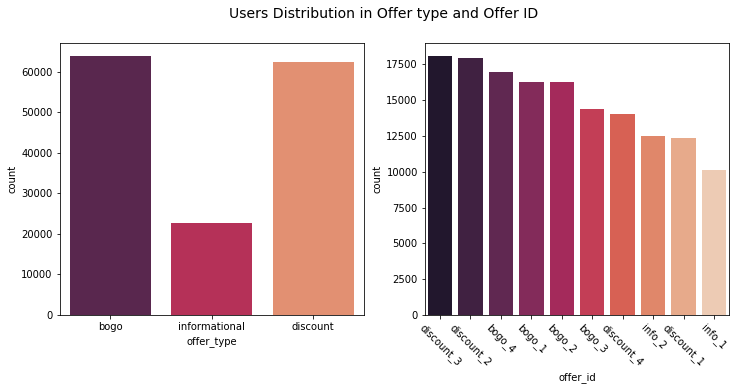

In [60]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,5)
fig.suptitle('Users Distribution in Offer type and Offer ID', size = 14)

sns.countplot(x='offer_type', data = df, ax = ax[0], palette='rocket');

sns.countplot(x='offer_id', data = df, order = df['offer_id'].value_counts(ascending=False).index, ax = ax[1],
              palette='rocket')
plt.xticks(rotation=-45);

In the left plot we see that most of the offers are listed as bogo and discount, more than 60,000 recieved the offer and we have clearly less informational offer types, a little bit over 20,000 offers recieved by customers.
<br>In the right plot we see that mostly discounts 2 and 3 has been sent, with more than 17,000 offers each.

### 2. What is the age distribution of customers?

In [61]:
df.age.min()

18

In [62]:
df.age.max()

101

In [63]:
int(round(df.age.mean()))

55

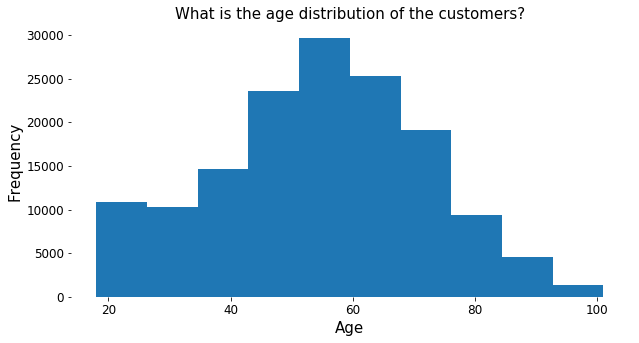

In [64]:
ax = df["age"].plot.hist(figsize=(10,5), fontsize=12)

ax.set_title("What is the age distribution of the customers?", fontsize=15)
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
sns.despine(bottom=True, left=True)

It seems the age distribution of the customers follows a normal distribution since the mean of the ages is 55 years.

### 3. How many people joined Starbucks as a member each year?

In [65]:
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,reward_x,age,...,income,year_joined,difficulty,duration,offer_type,ch_email,ch_mobile,ch_social,ch_web,customer_response
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,bogo_3,0.0,0.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,0
1,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,bogo_3,0.0,0.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,1
2,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,bogo_3,0.0,5.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,1
3,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,bogo_3,0.0,0.0,68,...,70000.0,2018,5,7,bogo,1,1,0,1,0
4,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,bogo_3,0.0,0.0,68,...,70000.0,2018,5,7,bogo,1,1,0,1,1


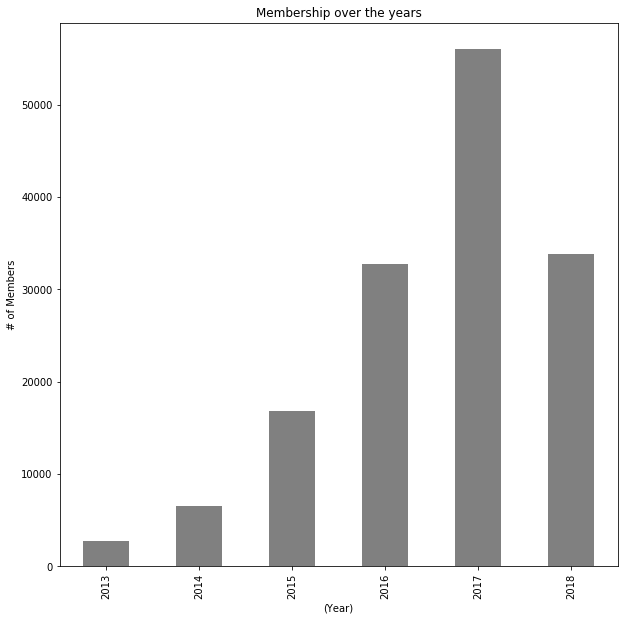

In [66]:
plt.figure(figsize=[10,10])
ax = df.year_joined.groupby([df["year_joined"]]).count()
ax.plot('bar', title='Membership over the years',color='grey' )

plt.xlabel("(Year)")
plt.ylabel("# of Members")
plt.ylim(0, )

plt.draw()

We can see in 2013 less than 5,000 members joined, 2014 less than 10,000 , in 2015 slightly less than 20,00 , in 2016 more than 30,000 , in 2017 more than 55,000 , and in 2018 around 35,000 members joined.

### 4. What is the offer completion rate?
Per offer how many completed their promotion?

In [67]:
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,reward_x,age,...,income,year_joined,difficulty,duration,offer_type,ch_email,ch_mobile,ch_social,ch_web,customer_response
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,bogo_3,0.0,0.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,0
1,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,bogo_3,0.0,0.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,1
2,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,bogo_3,0.0,5.0,75,...,100000.0,2017,5,7,bogo,1,1,0,1,1
3,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,bogo_3,0.0,0.0,68,...,70000.0,2018,5,7,bogo,1,1,0,1,0
4,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,bogo_3,0.0,0.0,68,...,70000.0,2018,5,7,bogo,1,1,0,1,1


In [68]:
# Create dataframe offer_response for distribution of offer_id, response_rate and offer_type
offer_response = df.groupby(['offer_id'])['offer_completed'].count().reset_index()
offer_response.rename(columns={'offer_completed': 'count'}, inplace=True)
completion_rate = df.groupby(['offer_id'])['offer_completed'].sum()/\
                df.groupby(['offer_id'])['offer_completed'].count()
np.round(completion_rate.values*100,2)
offer_response['completion_rate'] = np.round(completion_rate.values*100,2)                                  
offer_response.sort_values(by=['completion_rate'], ascending=False)

,offer_id,count,completion_rate
2,bogo_3,14372,29.14
7,discount_4,14002,27.93
6,discount_3,18062,27.70
4,discount_1,12327,27.47
5,discount_2,17920,27.27
3,bogo_4,16989,24.15
0,bogo_1,16241,22.52
1,bogo_2,16232,20.39
8,info_1,10144,0.00
9,info_2,12516,0.00


We can see that offer completion rate for bogo_3 is 29% higher than all other categories, this bogo_3 used web, email, mobile for their point of contact. The next rate is for all discount categories which is 27%. We can infer that discounts play a huge role in helping customers complete their orders.

  -------------------------------------------------


# Train and Test splits:

In [69]:
# Showing all columns of the dataframe, we need all columns for selecting features for modeling.
pd.options.display.max_columns = None

In [70]:
df.head()

,customer_id,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,amount,reward_x,age,membership_date,gender,income,year_joined,difficulty,duration,offer_type,ch_email,ch_mobile,ch_social,ch_web,customer_response
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,bogo_3,0.0,0.0,75,2017-05-09,F,100000.0,2017,5,7,bogo,1,1,0,1,0
1,78afa995795e4d85b5d9ceeca43f5fef,6,0,0,1,0,bogo_3,0.0,0.0,75,2017-05-09,F,100000.0,2017,5,7,bogo,1,1,0,1,1
2,78afa995795e4d85b5d9ceeca43f5fef,132,1,0,0,0,bogo_3,0.0,5.0,75,2017-05-09,F,100000.0,2017,5,7,bogo,1,1,0,1,1
3,e2127556f4f64592b11af22de27a7932,408,0,1,0,0,bogo_3,0.0,0.0,68,2018-04-26,M,70000.0,2018,5,7,bogo,1,1,0,1,0
4,e2127556f4f64592b11af22de27a7932,420,0,0,1,0,bogo_3,0.0,0.0,68,2018-04-26,M,70000.0,2018,5,7,bogo,1,1,0,1,1


In [71]:
# dropping columns that have less woles in predicting wheter a customer responds to an offer or not
df.drop(columns=['customer_id', 'offer_type', 'membership_date','amount'], inplace=True)

In [72]:
df.shape

(148805, 18)

In [73]:
# Changing values of gender column and offer_id column to numerical instead of a string, preparing it for the modeling

offer_id = {'bogo_1': 1,
            'bogo_2': 2,
            'bogo_3': 3,
            'bogo_4': 4,
            'discount_1': 5,
            'discount_2': 6,
            'discount_3': 7,
            'discount_4': 8,
            'info_1': 9,
            'info_2': 10}
gender = {'F': 1,
          'M': 2,
          'O': 3}
df.offer_id = df.offer_id.apply(lambda x: offer_id[x] if x else None)
df.gender = df.gender.apply(lambda x: gender[x] if x else None)

In [74]:
df.head()

,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,reward_x,age,gender,income,year_joined,difficulty,duration,ch_email,ch_mobile,ch_social,ch_web,customer_response
0,0,0,1,0,0,3,0.0,75,1,100000.0,2017,5,7,1,1,0,1,0
1,6,0,0,1,0,3,0.0,75,1,100000.0,2017,5,7,1,1,0,1,1
2,132,1,0,0,0,3,5.0,75,1,100000.0,2017,5,7,1,1,0,1,1
3,408,0,1,0,0,3,0.0,68,2,70000.0,2018,5,7,1,1,0,1,0
4,420,0,0,1,0,3,0.0,68,2,70000.0,2018,5,7,1,1,0,1,1


In [75]:
# Separate features and labels of combined_data_df
X = df.drop(columns=['customer_response'])
y = df.loc[:,['customer_response']]

In [76]:
# How many responses we got.
y.squeeze().value_counts()

1    82304
0    66501
Name: customer_response, dtype: int64

In total 82,304 responded offers, and 66,501 offers that is just received and even not opened.

In [77]:
# The percentage of responses to see whether our binary classification is balanced.
round((y.squeeze().value_counts()/y.squeeze().count())*100,2)

1    55.31
0    44.69
Name: customer_response, dtype: float64

In [78]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
# Exploring the test dataset
X_test.head()

,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,reward_x,age,gender,income,year_joined,difficulty,duration,ch_email,ch_mobile,ch_social,ch_web
93490,6,1,0,0,0,7,2.0,63,1,77000.0,2017,10,10,1,1,1,1
79279,336,0,1,0,0,9,0.0,32,2,70000.0,2018,0,4,1,1,0,1
5980,546,0,0,1,0,3,0.0,57,2,73000.0,2015,5,7,1,1,0,1
124850,90,1,0,0,0,5,5.0,50,1,72000.0,2016,20,10,1,0,0,1
46034,336,1,0,0,0,4,5.0,41,1,50000.0,2017,5,5,1,1,1,1


In [80]:
y_test.head()

,customer_response
93490,1
79279,0
5980,1
124850,1
46034,1


In [81]:
# Scaling 3 columns of duration, difficulty and reward_x for unity and better results in modeling

scale = ['difficulty', 'duration', 'reward_x']

def scale_df(df, feat=scale):
        # selected features for scale
        df_feat_scale = df.loc[:,feat]
        
        # apply MinMax scaling
        scaler = MinMaxScaler()
        df_feat_scale = pd.DataFrame(scaler.fit_transform(df_feat_scale), columns = df_feat_scale.columns,\
                                     index=df_feat_scale.index)
        
        # drop previous unscaled features and concat scaled features
        df = df.drop(columns=feat, axis=1)
        df_scaled = pd.concat([df, df_feat_scale], axis=1)
        
        # return final dataframe with scaled columns
        return df_scaled

In [82]:
X_train.head()

,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,reward_x,age,gender,income,year_joined,difficulty,duration,ch_email,ch_mobile,ch_social,ch_web
136857,576,0,1,0,0,2,0.0,57,1,73000.0,2016,10,5,1,1,1,1
52882,408,0,1,0,0,4,0.0,33,2,51000.0,2017,5,5,1,1,1,1
79388,564,0,0,1,0,9,0.0,38,2,31000.0,2018,0,4,1,1,0,1
67091,372,1,0,0,0,8,2.0,70,2,30000.0,2015,10,7,1,1,0,1
15274,408,0,1,0,0,10,0.0,75,2,97000.0,2015,0,3,1,1,1,0


In [83]:
# Applying scale_df method to X_train
X_train_scaled = scale_df(X_train, feat=scale)
X_train_scaled.head()

,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,age,gender,income,year_joined,ch_email,ch_mobile,ch_social,ch_web,difficulty,duration,reward_x
136857,576,0,1,0,0,2,57,1,73000.0,2016,1,1,1,1,0.50,0.285714,0.0
52882,408,0,1,0,0,4,33,2,51000.0,2017,1,1,1,1,0.25,0.285714,0.0
79388,564,0,0,1,0,9,38,2,31000.0,2018,1,1,0,1,0.00,0.142857,0.0
67091,372,1,0,0,0,8,70,2,30000.0,2015,1,1,0,1,0.50,0.571429,0.2
15274,408,0,1,0,0,10,75,2,97000.0,2015,1,1,1,0,0.00,0.000000,0.0


In [84]:
round((y_test.squeeze().value_counts()/y_test.squeeze().count())*100,2)

1    55.14
0    44.86
Name: customer_response, dtype: float64

# Modeling:

In [85]:
# Define model_fitting method to find the best performing modelusing grid search.

def model_fitting(clf, param_grid, X=X_train, y=np.ravel(y_train)):
    
    # cv uses StratifiedKFold
    # scoring f1 available as evaluation metric
    start = time.time()
    grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=0)
    print("Training {} :".format(clf.__class__.__name__))
    grid.fit(X, y)
    end = time.time()
    time_taken = round(end-start,2)

    print(clf.__class__.__name__)
    print("Time taken : {} secs".format(time_taken))
    print("Best accuracy : {}".format(round(grid.best_score_,4)))
    print("*"*40)
    
    return grid.best_score_, grid.best_estimator_, time_taken

In [86]:
# defining different models
lr = LogisticRegression()
rf = RandomForestClassifier(max_depth=5, n_estimators=10)
ab = AdaBoostClassifier()
# svc = SVC(kernel="linear", C=0.025) # This model takes a long time to be trained
gb = GradientBoostingClassifier()
gnb = GaussianNB()
dt = DecisionTreeClassifier(max_depth=5)

In [87]:
# Find best classification algorithm
clf_names = []
clf_scores = []
clf_best_ests = []
clf_time_taken = []
clf_dict = {}

# Fitting all models and find the best model by f1 score
for clf in [lr,rf,ab,gb,gnb,dt]:
    best_score, best_est, time_taken = model_fitting(clf, {})
    clf_names.append(clf.__class__.__name__)
    clf_scores.append(best_score)
    clf_best_ests.append(best_est)
    clf_time_taken.append(time_taken)

Training LogisticRegression :
LogisticRegression
Time taken : 10.98 secs
Best accuracy : 1.0
****************************************
Training RandomForestClassifier :
RandomForestClassifier
Time taken : 1.94 secs
Best accuracy : 1.0
****************************************
Training AdaBoostClassifier :
AdaBoostClassifier
Time taken : 0.5 secs
Best accuracy : 1.0
****************************************
Training GradientBoostingClassifier :
GradientBoostingClassifier
Time taken : 10.86 secs
Best accuracy : 1.0
****************************************
Training GaussianNB :
GaussianNB
Time taken : 0.33 secs
Best accuracy : 0.8953
****************************************
Training DecisionTreeClassifier :
DecisionTreeClassifier
Time taken : 0.43 secs
Best accuracy : 1.0
****************************************


Since we get good results hyper parameters for models such as max_depth in decision tree for example are good enough. This hyper parameter shows how much we want to continue the trees.

In [88]:
# Create clf_df dataframe from clf_dict for better visualization of the results
clf_dict['best_accuracy'] = clf_scores
clf_dict['time_taken(s)'] = clf_time_taken
clf_dict['best_est'] = clf_best_ests
clf_df = pd.DataFrame(clf_dict, index=clf_names)
clf_df

,best_accuracy,time_taken(s),best_est
LogisticRegression,1.000000,10.98,"LogisticRegression(C=1.0, class_weight=None, d..."
RandomForestClassifier,1.000000,1.94,"(DecisionTreeClassifier(class_weight=None, cri..."
AdaBoostClassifier,1.000000,0.50,"(DecisionTreeClassifier(class_weight=None, cri..."
GradientBoostingClassifier,1.000000,10.86,([DecisionTreeRegressor(criterion='friedman_ms...
GaussianNB,0.895305,0.33,GaussianNB(priors=None)
DecisionTreeClassifier,1.000000,0.43,"DecisionTreeClassifier(class_weight=None, crit..."


"DecisionTreeClassifier" worked better and even faster.

In [89]:
# Applying scale to the df
X_test_scaled = scale_df(X_test, feat=scale)
X_test_scaled.head()

,time,offer_completed,offer_received,offer_viewed,transaction,offer_id,age,gender,income,year_joined,ch_email,ch_mobile,ch_social,ch_web,difficulty,duration,reward_x
93490,6,1,0,0,0,7,63,1,77000.0,2017,1,1,1,1,0.50,1.000000,0.2
79279,336,0,1,0,0,9,32,2,70000.0,2018,1,1,0,1,0.00,0.142857,0.0
5980,546,0,0,1,0,3,57,2,73000.0,2015,1,1,0,1,0.25,0.571429,0.0
124850,90,1,0,0,0,5,50,1,72000.0,2016,1,0,0,1,1.00,1.000000,0.5
46034,336,1,0,0,0,4,41,1,50000.0,2017,1,1,1,1,0.25,0.285714,0.5


In [94]:
print(dt.get_params().keys())

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])


In [95]:
# Choosing random forest classifier, and its parameters

param_grid = {'max_depth': [10], # Changing the max_depth to 10 to see if the results change
              'random_state': [42], # Random state is 42
              'min_samples_split': [2], # minimum of samples that are splitted is 2
              'max_leaf_nodes': [2] # minimum of leaf nodes is 2
             }

dt_best_score, dt_best_est, _ = model_fitting(dt, param_grid)
dt_best_est

Training DecisionTreeClassifier :
DecisionTreeClassifier
Time taken : 0.41 secs
Best accuracy : 1.0
****************************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [ ]:
# Predicting output of test input using Random Forest Classifier
y_pred = rfc_best_est.predict(X_test_scaled)
y_pred

In [ ]:
# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test.squeeze().values, y_pred).ravel()
print('true negatives: {}'.format(tn))
print('false postives: {}'.format(fp))
print('false negatives: {}'.format(fn))
print('true postives: {}'.format(tp))

Scoring metrics used here are accuracy, f-1 score, precision and recall. Accuracy in binary classification is number of correct predictions divided by total number of predictions. For binary classification with balanced dataset accuracy is a good method to measure how well our model is to capture the dataset patterns. Precision measures how many positive predictions made by the model. Recall focuses on the positive classes that is identified by the classifier. F-1 score is the harmonic mean of precision and recall, it is mostly used when the classes are imbalanced but we wanted to see what happens if the classes are balanced as extera method of model evaluation, but because of having precision and recall equal to 1 f-1 score is 1 too which does not help a lot.

In [ ]:
# Applying f1, precision and recall on test dataset
test_f1 = f1_score(y_test.squeeze().values, y_pred)
test_precision = precision_score(y_test.squeeze().values.tolist(), y_pred)
test_recall = recall_score(y_test.squeeze().values, y_pred)
print('f1 on test data: {}'.format(round(test_f1,4)))
print('precision on test data: {}'.format(round(test_precision,4)))
print('recall on test data: {}'.format(round(test_recall,4)))

From my observation from the table above "DecisionTreeClassifier" worked the best, not only this classifier has a great (100%) accuracy but also is really fast. Naive Bayes worked the fastest but the accuracy is lower than other classifiers. The accuracy metric has been chosen to see how many of the predicted test items have correct labels. At the end we see all the f_1 score, precision and recall are 1. The confusion matrix which is consists of true negatives, false negatives, true positives, and false negatives are captured above. We can see that because of predicting all the test items correctly we don't have false positives or false negatives.
<br>Having a high accuracy we should be cautious about the bias in our model. A bias is our model works best with this dataset but not very well with unseen test data in the future. My speculation is that the dataset is pretty clean that my models all guessed the outcome pretty well.
<br>
<br>Future work can be investigating into the other reasons why these models performed very well, fine tuning the models and feature extraction, gathering more data and test the models on new data to see how well my models can generalize based on unseen data.